# Image Segmentation
In this notebook, I will try to figure out how to segment satellite images. If I can segment out the buildings, then maybe I can use color histograms to classify different segments as building/non-building.

## Watershed algorithm
The watershed algorithm is one way to segment images. Any grayscale image can be thought of as a topographic surface where intensity corresponds to elevation. We can imagine filling the surface with water of different colors, one color in each valley. As the water level rises, different pools will start to merge, but we can avoid that by building barriers between the different colors. In the end, when the whole surface is submerged, the barriers that we have built are the segmentation result.

### Example 1
This example comes from the [OpenCV-Python Tutorials](http://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html).

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Load image
imageDir = '../images/'
img = cv2.imread(imageDir + 'segmentation/coins.jpg')

In [3]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

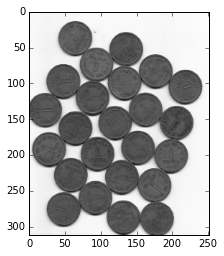

In [4]:
# Displaying grayscale image
plt.imshow(gray, cmap=plt.cm.Greys_r)

In [5]:
# Threshold using Otsu's binarization
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + \
                           cv2.THRESH_OTSU)

Otsu's method is used to perform clustering-based image thresholding, or the reduction of a grayscale image to a binary image. The algorithm assumes that the image contains two classes of pixels following a bi-modal histogram (foreground vs. background), and calculates the optimum threshold separating the two classes. ([Wikipedia](https://en.wikipedia.org/wiki/Otsu's_method))

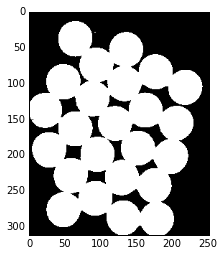

In [6]:
# Display result of thresholding
plt.imshow(thresh, cmap=plt.cm.Greys_r)

The next step is to remove any noise using morphological opening:

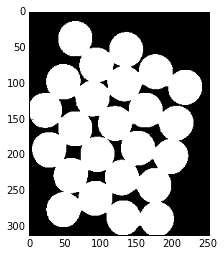

In [15]:
# Noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Display result of opening
plt.imshow(opening, cmap=plt.cm.Greys_r)

We can find the areas that are definitely background (in black) by dilating the foreground (expanding the white areas).

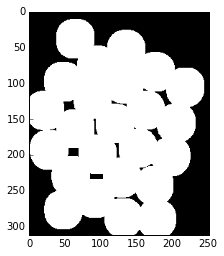

In [17]:
# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)
plt.imshow(sure_bg, cmap=plt.cm.Greys_r)

Similarly, we can find the areas that are definitely foreground (in white) by calculating the distance between each foreground pixel and the nearest background pixel, then thresholding at some distance to separate the "sure" foreground pixels from the ones where we are not quite sure if they are foreground or background.

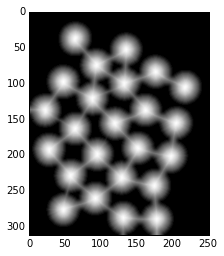

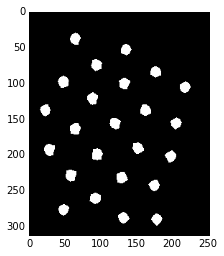

In [42]:
# Calculate distance from each foreground pixel to a background pixel
dist_transform = cv2.distanceTransform(opening, 2, 5)
plt.figure()
plt.imshow(dist_transform, cmap=plt.cm.Greys_r)
# Threshold to find sure foreground pixels
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(),\
                            255, 0)
plt.figure()
plt.imshow(sure_fg, cmap=plt.cm.Greys_r)

Now we can find the region where we're unsure whether to classify pixels as foreground or background by subtracting the two regions.

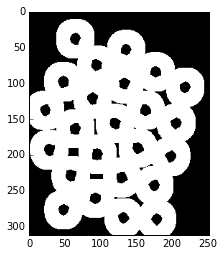

In [45]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown, cmap=plt.cm.Greys_r)

[Link 1](http://stackoverflow.com/questions/11294859/how-to-define-the-markers-for-watershed-in-opencv)

[Link 2](http://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Watershed_Algorithm_Marker_Based_Segmentation.php)
